<a href="https://colab.research.google.com/github/andreventura02/Data_science/blob/master/Projeto_N%C3%BAmero_01_O_Projeto_de_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Projeto Número 01: O Projeto de Insights
Desafio do Blog [SejaUmDataScient](https://sejaumdatascientist.com) do professor Meigarom Lopes.
<p>
  <img src="https://live.staticflickr.com/7009/6613291037_1996399de2_c.jpg" width="400px">
</p>

## Contexto do Desafio
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

**1 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</br>
2 - Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</br>
3 - A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

## Os Dados do Desafio
O conjunto de dados que representam o contexto está disponível na plataforma do Kaggle.
Esse é o link: https://www.kaggle.com/harlfoxem/housesalesprediction

Esse conjunto de dados contém casas vendidas entre Maio de 2014 e Maio de 2015. Você usará esses dados para desenvolver sua solução.

In [332]:
# importar os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o notebook
%matplotlib inline
%pylab inline

plt.style.use( 'ggplot' )
plt.rcParams['figure.figsize'] = [20,12]
plt.rcParams['font.size'] = 30
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [333]:
# importar dataset em csv
df = pd.read_csv('kc_house_data.csv')

## Dicionário das variáveis


id - Identificação única para cada casa vendida

date - Data da venda da casa

price - preço de cada casa vendida

bedrooms - Número de quartos

bathrooms - Número de banheiros, onde .5 contas para um banheiro com lavabo, mas sem chuveiro

sqft_living - Metragem quadrada do interior dos apartamentos 

sqft_lot - metragem quadrada do terreno

floors - Número de andares

waterfront - Vista para o mar

view - Um índice de 0 a 4 de quão boa é a vista da propriedade era

condition - Um índice de 1 a 5 na condição do apartamento

grade - Um índice de 1 a 13 sobre a construção e design das casas:


*   1-5: Ruim
*   6-10: Mediano
*   11-13: Excelente


sqft_above - A metragem quadrada do espaço interno acima do nível do solo

sqft_basement - A metragem quadrada do espaço interno abaixo do nível do solo

yr_built - O ano em que a casa foi construída inicialmente

yr_renovated - O ano da última reforma

zipcode - o Cep da área em que casa está

lat - Latitude

long - Longitude

sqft_living15 - A metragem quadrada interna para os 15 vizinhos mais próximos

sqft_lot15 - A metragem quadrada dos lotes dos 15 vizinhos mais próximos

In [334]:
# mostrar as 5 primeiras entradas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [335]:
# ver o resumo estatístico das variáveis
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [336]:
# verificar dados nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [337]:
# tranformar coluna date em datetime
df['date'] = pd.to_datetime(df['date'])

In [338]:
# mostrar as 5 primeiras entradas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [339]:
# criando variável Month a partir da variável date
df['month'] = df.date.dt.month

Após a criação da variável month, já é possível responder uma das perguntas da questão 2 do desafio!

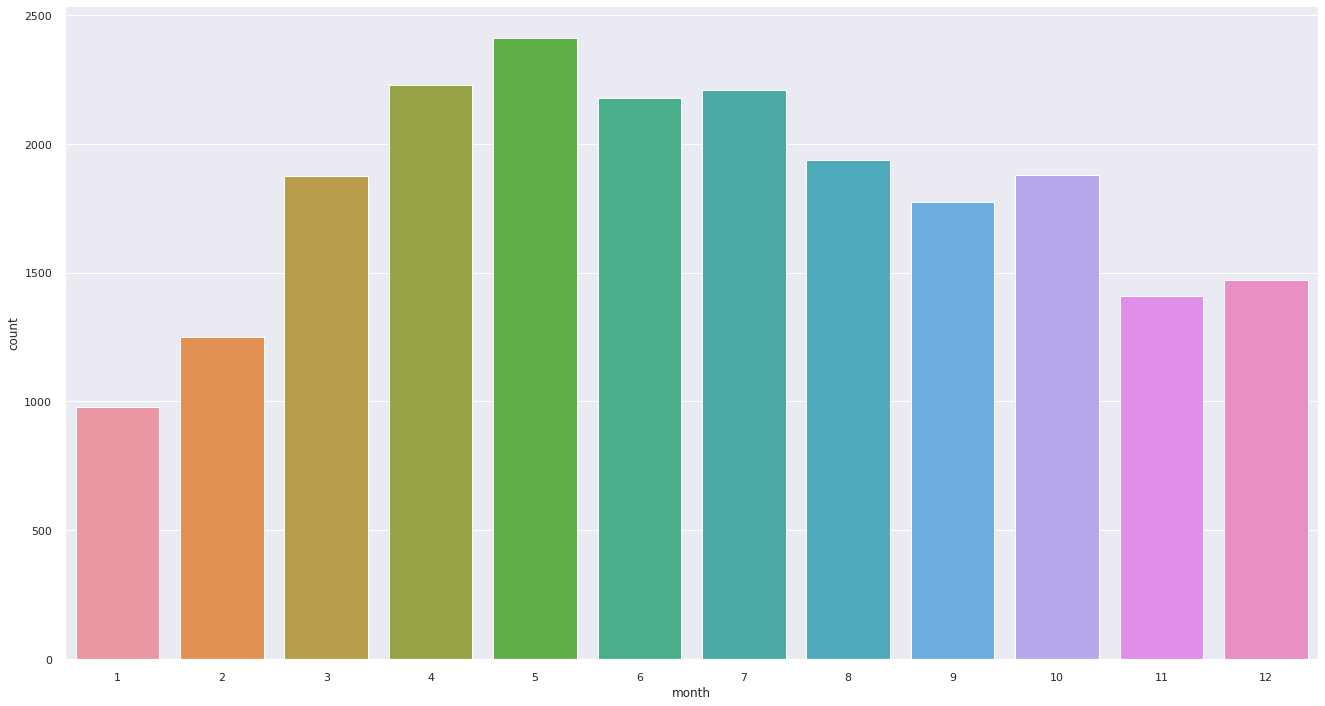

In [340]:
# plotando um gráfico para saber em qual mês mais casas são vendidas
sns.countplot(df['month']);
# Mês que mais vende -  Maio
# Mês que menos vende - Janeiro

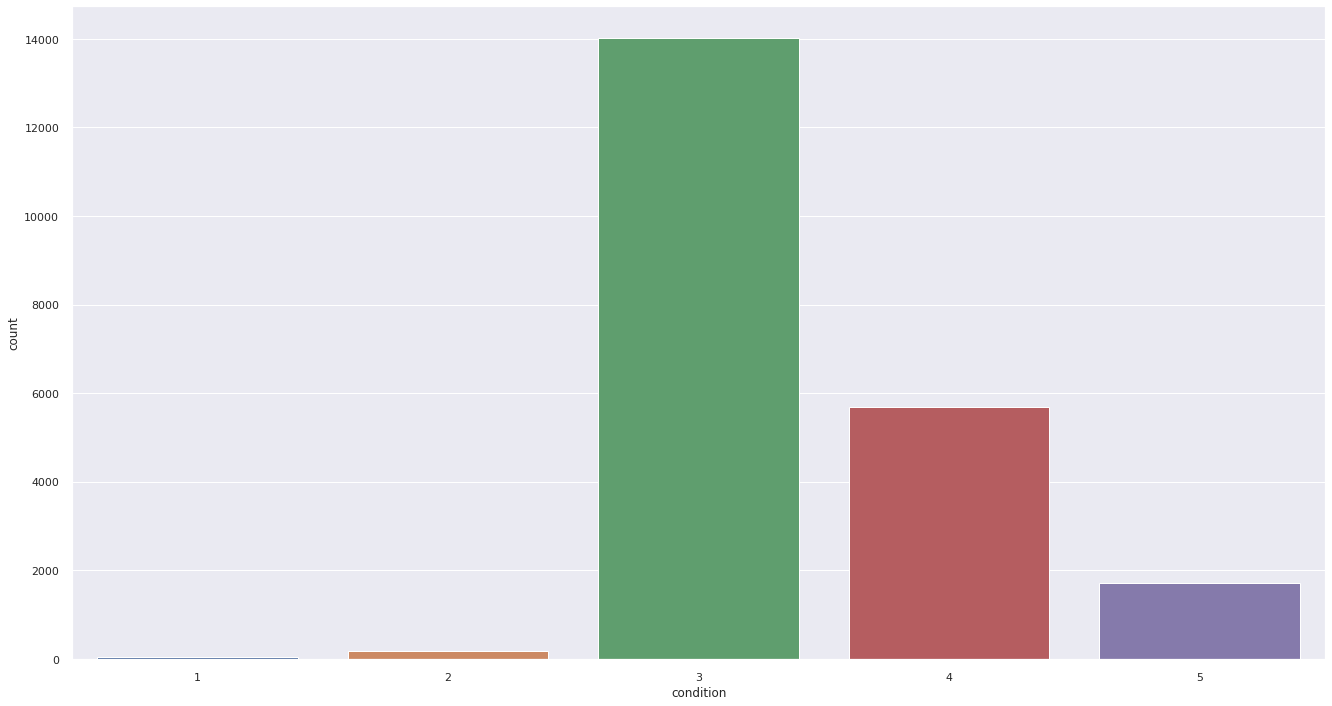

In [341]:
sns.countplot(df['condition']);
# casas com condições 3 vendem mais, provavelmente por conta do custo x beneficio

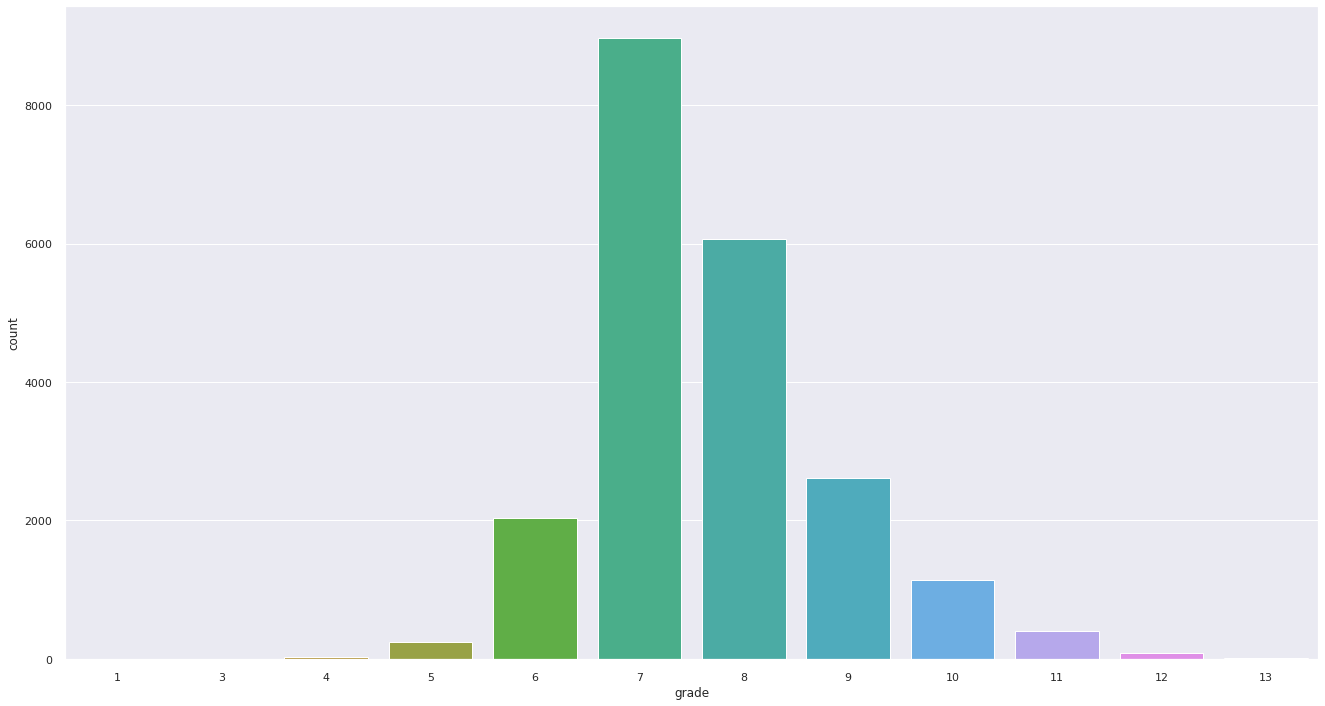

In [342]:
sns.countplot(df['grade']);
# são vendidas mais casas com design e construções medianas (custo x beneficio)

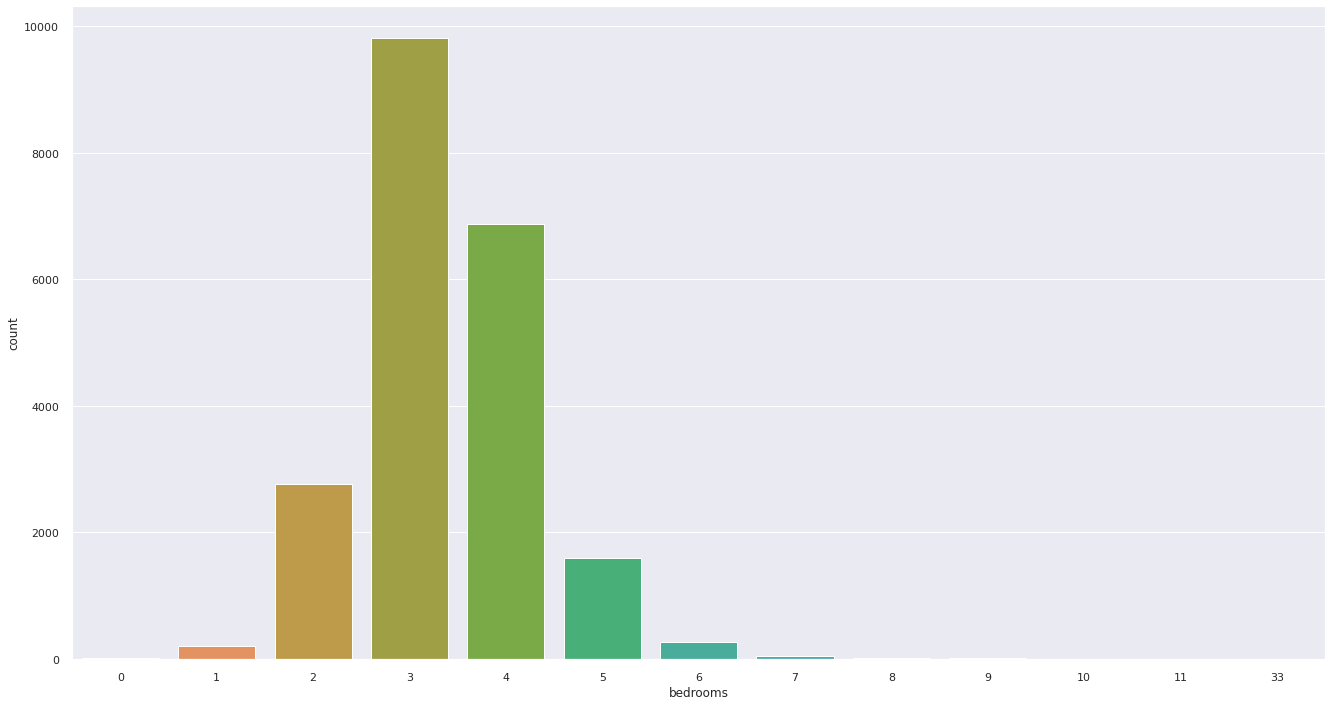

In [343]:
sns.countplot(df['bedrooms']);
# 3 quartos é o ideal, visto que a média de filhos mundial é de 1.7, ou seja, 1 - Casal e 2 - Filhos

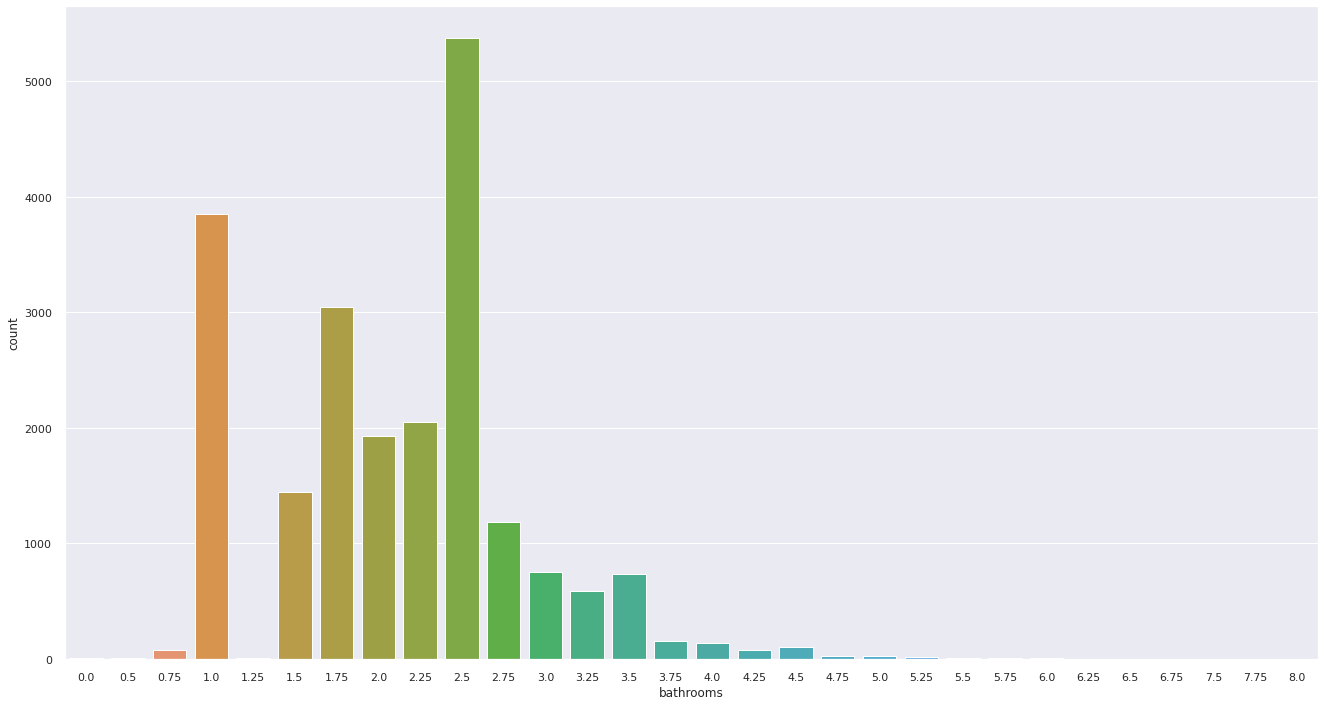

In [344]:
# verificando quantos banheiros tem por casa
sns.countplot(df['bathrooms']);

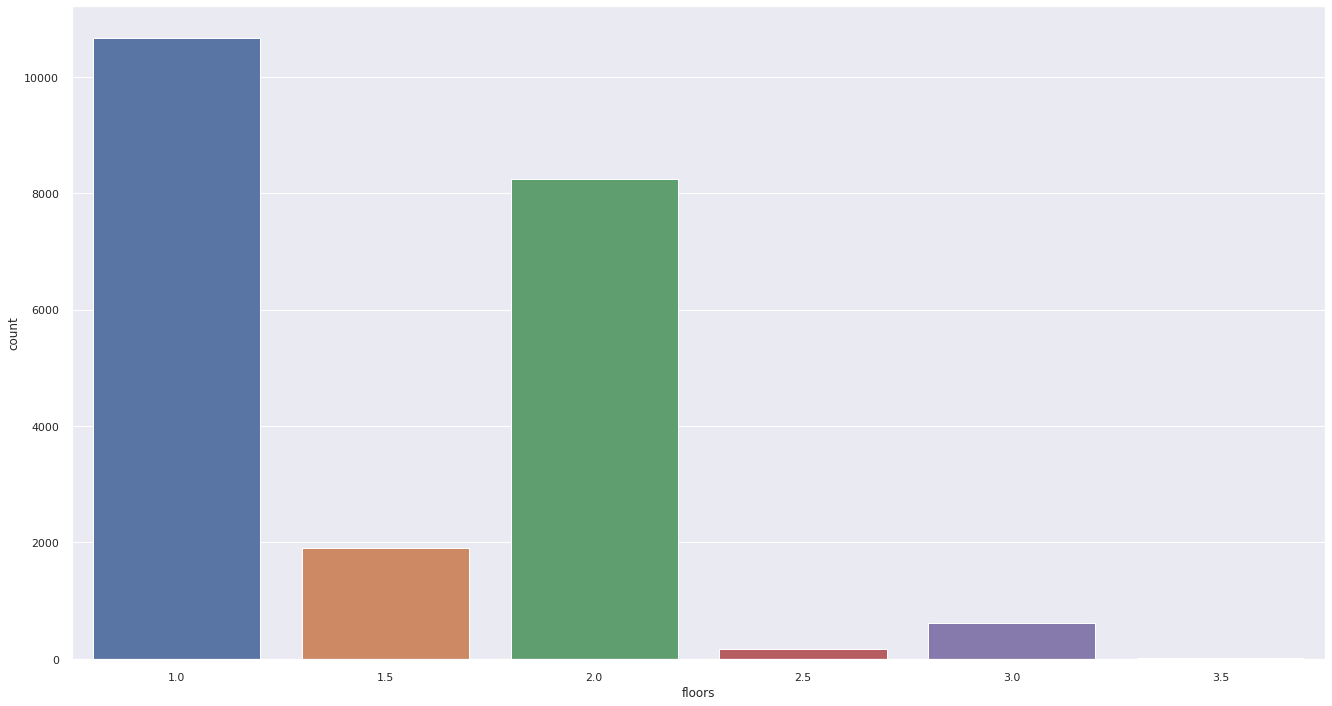

In [345]:
sns.countplot(df['floors']);
# vende-se mais casas térreas ou com 2 andares

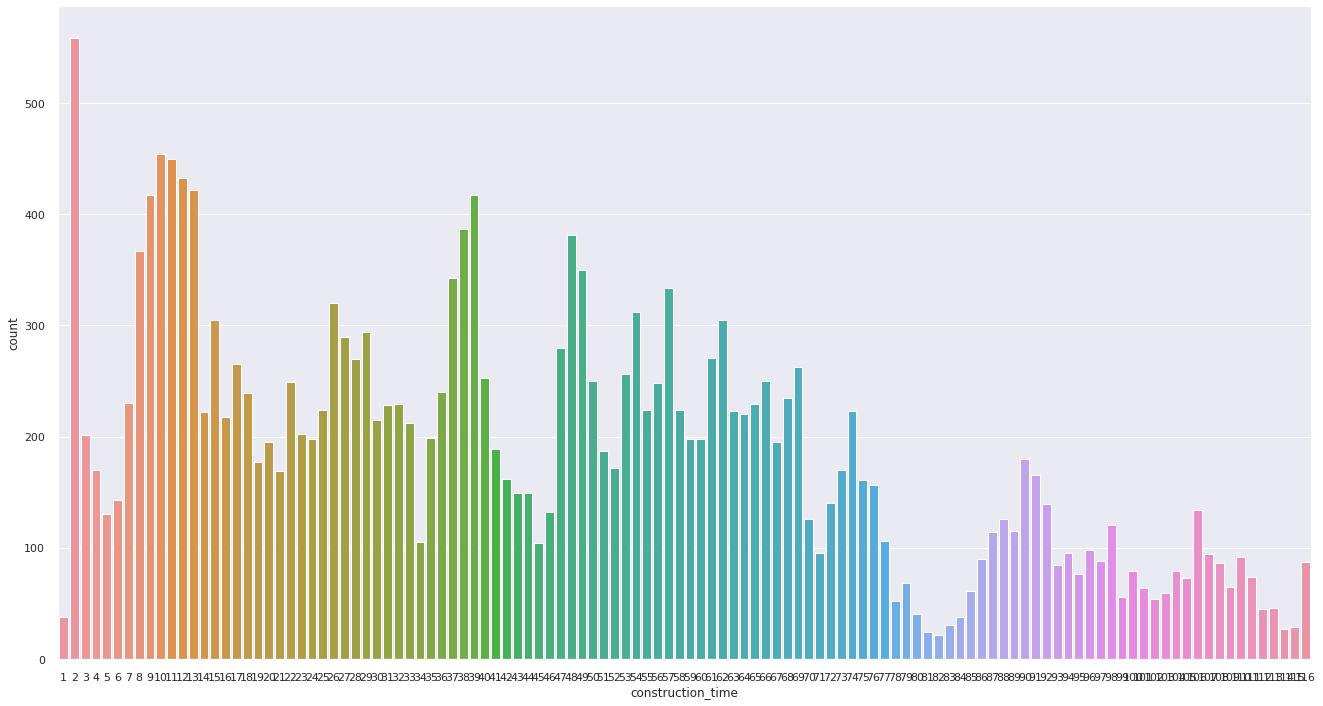

In [346]:
# supondo que estivessemos em 2016, criaremos a variável construction_time(tempo desde a sua construção)
df['construction_time'] = 2016 - df['yr_built']
sns.countplot(df['construction_time']);
# São vendidas mais casas com até 10 anos desde a sua construção

In [347]:
# casas reformadas vendem mais?
df['renovated'] = [0 if x == 0 else 1 for x in df['yr_renovated']]

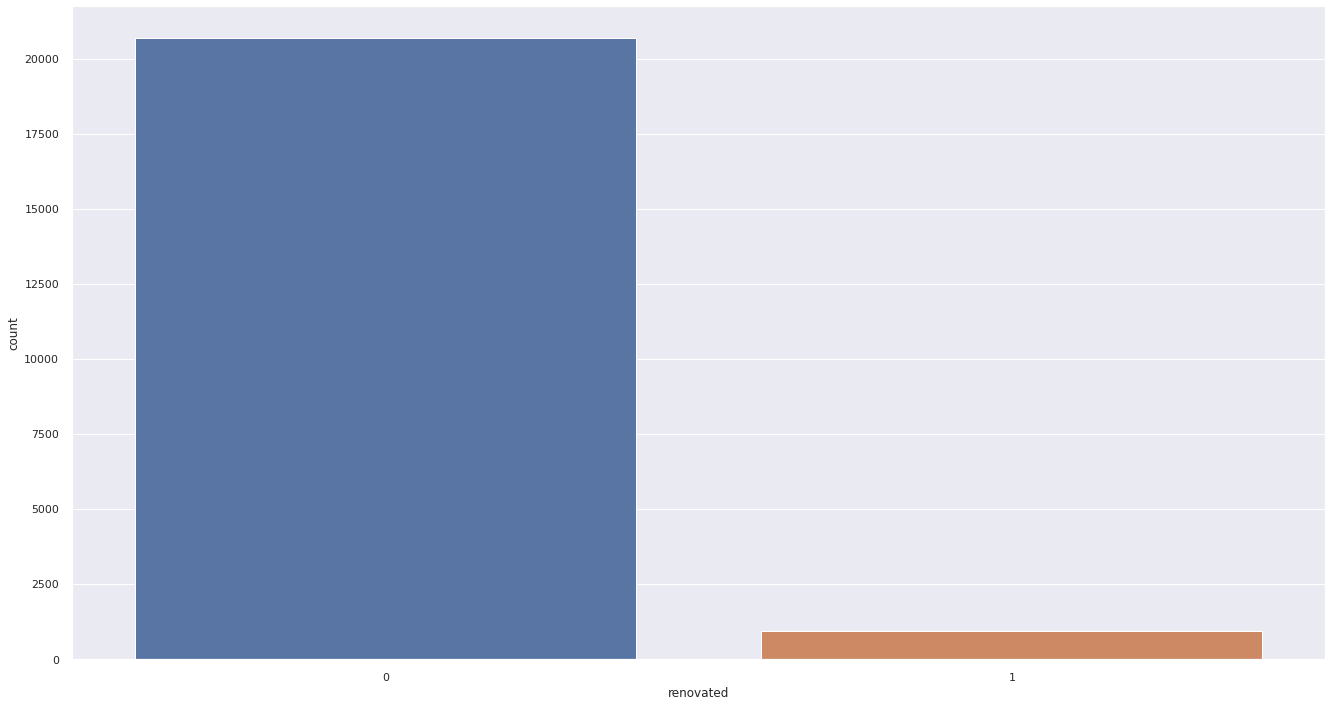

In [348]:
sns.countplot(df['renovated']);
# vende-se mais casas sem reformas

Após observar as variáveis que influenciam mais no preço, irei filtrar o dataset com as condições mais vendidas.

In [349]:
# melhores condições para compra de casa
new_df = df.query('condition == 3 & grade == 7 & bathrooms == 2.5 & bedrooms == 3 & floors == 1 & construction_time <= 10')

In [375]:
# criando um dataset com condições mais importantes para verificar a média de preço/metro_construido
media = df.query('condition == 3 & grade == 7 & construction_time <= 10')

In [350]:
# mostrar o dataset com casas ideais para compra
new_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,construction_time,renovated
17691,7861500150,2014-12-02,389900.0,3,2.5,2160,59241,1.0,0,0,3,7,2160,0,2007,0,98042,47.3304,-122.130,2290,125017,12,9,0
20538,2722069077,2015-04-09,430000.0,3,2.5,2075,39553,1.0,0,0,3,7,2075,0,2012,0,98038,47.3601,-122.032,1960,9047,4,4,0
21570,3438501862,2014-05-13,330000.0,3,2.5,1450,5008,1.0,0,0,3,7,840,610,2007,0,98106,47.5435,-122.357,2120,5019,5,9,0


In [376]:
# mostrar o dataset com casas com as 3 condições mais importantes
media

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,construction_time,renovated
56,9478500640,2014-08-19,292500.0,4,2.50,2250,4495,2.0,0,0,3,7,2250,0,2008,0,98042,47.3663,-122.114,2250,4500,8,8,0
89,3869900162,2014-09-04,335000.0,2,1.75,1030,1066,2.0,0,0,3,7,765,265,2006,0,98136,47.5394,-122.387,1030,1106,9,10,0
147,3224079105,2014-08-06,430000.0,2,2.50,2420,60984,2.0,0,0,3,7,2420,0,2007,0,98027,47.5262,-121.943,1940,193842,8,9,0
565,7203102050,2014-07-28,435000.0,3,2.50,1840,5680,2.0,0,0,3,7,1840,0,2008,0,98053,47.6969,-122.026,1600,4697,7,8,0
576,8669160310,2014-12-09,266000.0,3,2.50,1805,3402,2.0,0,0,3,7,1805,0,2009,0,98002,47.3521,-122.212,2095,3402,12,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,567000385,2014-06-23,362500.0,2,1.50,940,1768,2.0,0,0,3,7,940,0,2009,0,98144,47.5925,-122.295,1130,1159,6,7,0
21584,952006823,2014-12-02,380000.0,3,2.50,1260,900,2.0,0,0,3,7,940,320,2007,0,98116,47.5621,-122.384,1310,1415,12,9,0
21585,3832050760,2014-08-28,270000.0,3,2.50,1870,5000,2.0,0,0,3,7,1870,0,2009,0,98042,47.3339,-122.055,2170,5399,8,7,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,7,0


In [377]:
# média de preço/metros de imoveis com condição 3, nota 7 e até 10 anos de construção
media['price'].sum()/media['sqft_living'].sum()

197.9204723969352

In [383]:
# verificando por se ao comprarmos as casas iremos lucrar ou ter prejuízo
sale_value = new_df['sqft_living']*197.9204723969352

purchase_price = new_df['price']
# Qual casa comprar?
sale_value - purchase_price #valor real do imóvel - valor de compra

17691    37608.220377
20538   -19315.019776
21570   -43015.315024
dtype: float64

In [384]:
sale_value

17691    427508.220377
20538    410684.980224
21570    286984.684976
Name: sqft_living, dtype: float64

## Insights

**1 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</br>
2 - Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</br>
3 - A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

1 - O CEO deveria comprar a casa com o id - 7861500150, pelo valor de $389900.0

2 - O momento ideal seria no mês de maio, com o valor de $427508.22

3 - Não, pois o imóvel está em boas condições e pouco tempo desde a sua construção.